In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal

In [29]:
XXSMALL_SIZE = 8
XSMALL_SIZE = 10
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
def get_count_df(path):
    df = pd.read_csv(path, sep = "\t", header = None)

    if (len(df[2].str.split('_',expand=True).iloc[1]) == 3):
        df[['name', 'e', 's']] = df[2].str.split('_',expand=True)
    else:
        df[['name', 'chr', 'e', 's']] = df[2].str.split('_',expand=True)
        df.drop(["chr"], axis = 1, inplace = True)
        
    df.drop([2, "name"], axis = 1, inplace = True)
    df.columns = ["errors", "count", "time", "s"]
    df["s"] = df["s"].str.split(".", expand = True)[0]
    df["s"] = df["s"].str.removeprefix("s")
    df["time"] = df["time"].str.removeprefix("e")
    #df.drop(["s"], axis = 1, inplace = True)
    df = df.astype("float64")
    df = df[df["time"] <= 0.3]
    return df    

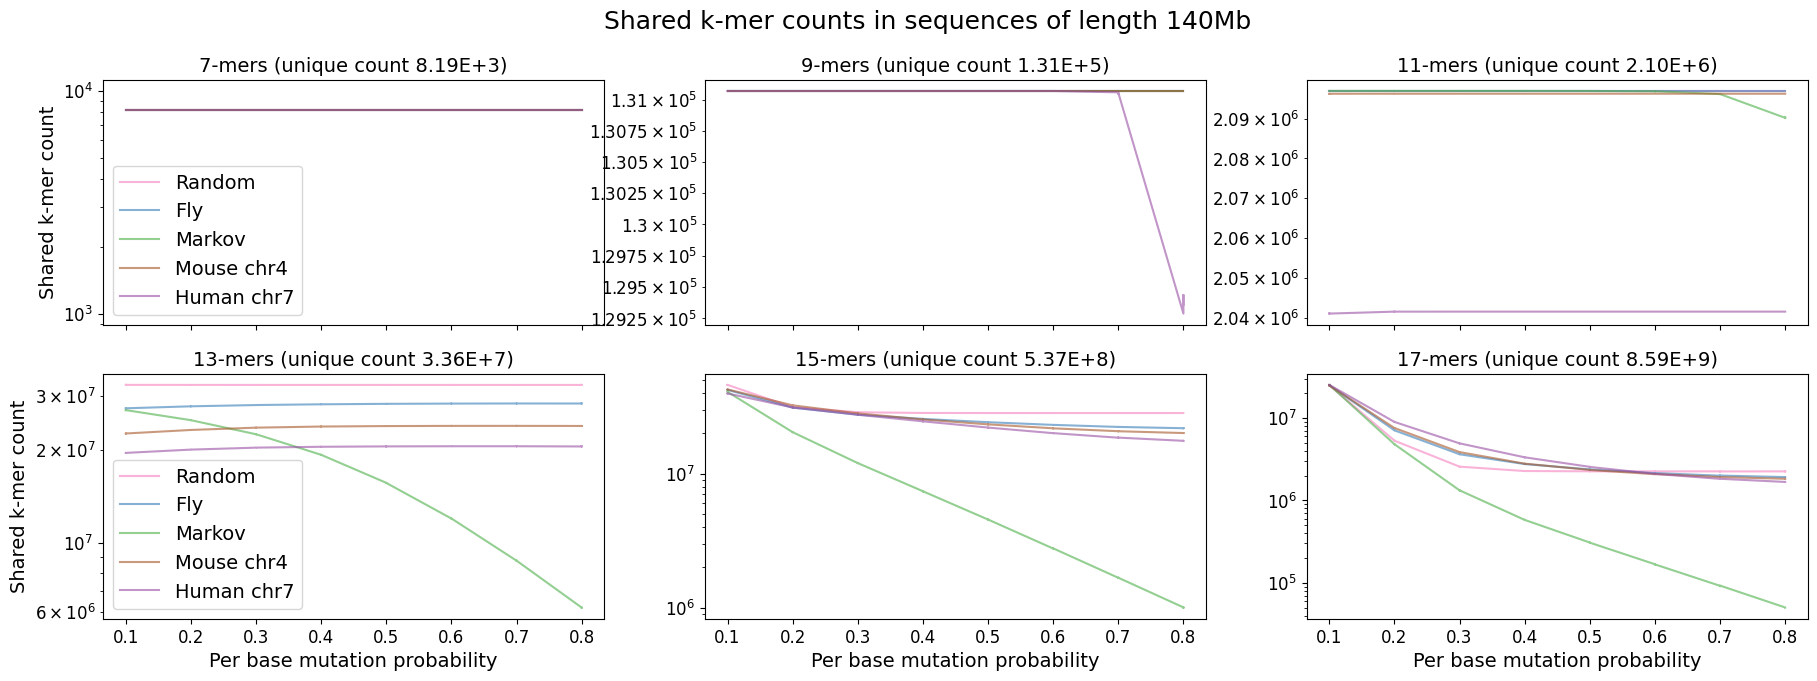

In [89]:
klens = [7, 9, 11, 13, 15, 17]

nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (22, 7))
fig.suptitle("Shared k-mer counts in sequences of length 140Mb")

# markov, mason, fly, mouse, human
lens = [140000000, 
        142000001-2000003, 
        143726040-1796589, 
        142621560-1760761, 
        143112906-1766827]

for i in range(len(klens)):
    k = klens[i]
    markov = get_count_df("data/140Mb/k" + str(k) + "/markov.shared.counts")
    mason = get_count_df("data/140Mb/k" + str(k) + "/mason.shared.counts")
    fly = get_count_df("data/140Mb/k" + str(k) + "/fly.shared.counts")
    mouse = get_count_df("data/140Mb/k" + str(k) + "/mouse_chr4.shared.counts")
    human = get_count_df("data/140Mb/k" + str(k) + "/human_chr7.shared.counts")
    human = human[human["count"]>0]

    #ax2 = ax1.twinx()
    #ax2.plot(markov["time"], markov["er"], 'b-')

    row = int(i/(nrows+1))
    col = i % ncols
    #ax[row][col].semilogy(mason["time"], [min(int(14e7), 4**k/2)] * len(mason["time"]), color = CB_color_cycle[1], label = "Max", alpha = 0.6)
    #ax[row][col].text(0.8, np.max(mason["count"])*0.8, "unique count " + str(4**k/2))
    ax[row][col].semilogy(mason["time"], mason["count"], color = CB_color_cycle[3], label = "Random", alpha = 0.6)
    ax[row][col].semilogy(fly["time"], fly["count"], color = CB_color_cycle[0], label = "Fly", alpha = 0.6)
    ax[row][col].semilogy(markov["time"], markov["count"], color = CB_color_cycle[2], label = "Markov", alpha = 0.6)
    ax[row][col].semilogy(mouse["time"], mouse["count"], color = CB_color_cycle[4], label = "Mouse chr4", alpha = 0.6)
    ax[row][col].semilogy(human["time"], human["count"], color = CB_color_cycle[5], label = "Human chr7", alpha = 0.6)
    
    ax[row][col].set_title(str(k) + "-mers (unique count " + str("{:.2E}".format(Decimal(4**k/2))) + ")")
    print()
ax[0][0].legend(loc = "lower left")
ax[1][0].legend(loc = "lower left")

for i in range(ncols):
    ax[nrows - 1][i].set_xlabel('Per base mutation probability')

for i in range(nrows):
    ax[i][0].set_ylabel('Shared k-mer count',)

plt.savefig('140Mb_counts.png', dpi = 300, bbox_inches='tight')
plt.show()

In [38]:
def plot_line(ax, df, s, col, lab, ls = "-"):
    #df = df[df["s"] == s]
    #df["count"] = df["count"] / df["count"].iloc[0]
    df = df.sort_values(by=['time'])
    ax.semilogy(df["time"], df["count"], linestyle = ls, color = col, label = lab, alpha = 0.6)


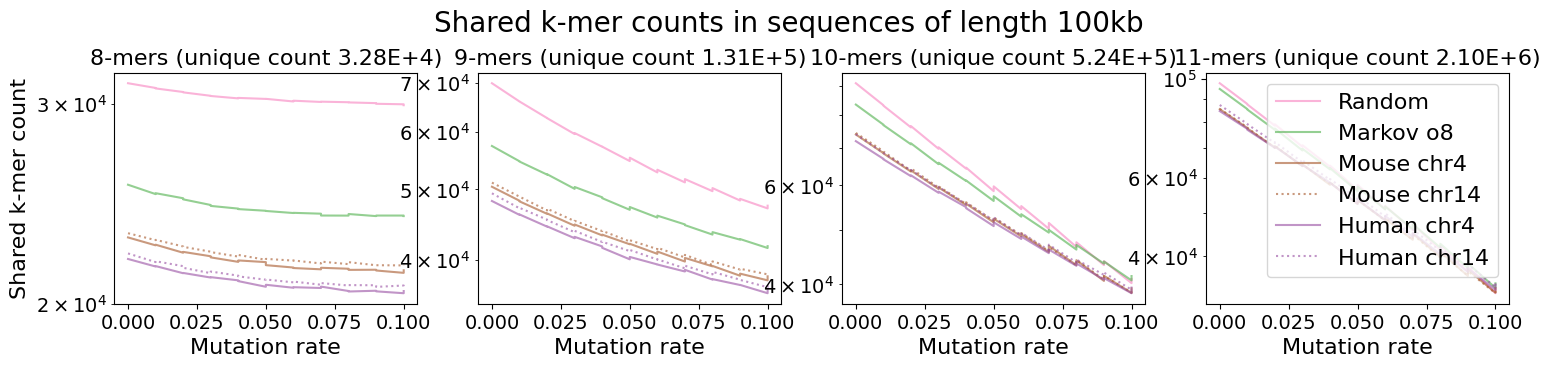

In [42]:
klens = [8, 9, 10, 11]

size = "100kb"
nrows = 1
ncols = 4
fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (18, 3))
fig.suptitle("Shared k-mer counts in sequences of length " + size)

for i in range(len(klens)):
    k = klens[i]
    markov = get_count_df("data/k" + str(k) + "/markov.shared.counts")
    mason = get_count_df("data/k" + str(k) + "/mason.shared.counts")
    #fly = get_count_df("data/k" + str(k) + "/fly.shared.counts")
    mouse4 = get_count_df("data/k" + str(k) + "/mouse_chr4.shared.counts")
    human4 = get_count_df("data/k" + str(k) + "/human_chr4.shared.counts")
    mouse14 = get_count_df("data/k" + str(k) + "/mouse_chr14.shared.counts")
    human14 = get_count_df("data/k" + str(k) + "/human_chr14.shared.counts")
    
    col = i

    #for s in np.unique(mason["s"]):
    for s in [11]:
        plot_line(ax[col], mason, s, col = CB_color_cycle[3], lab = "Random")
        plot_line(ax[col], markov, s, col = CB_color_cycle[2], lab = "Markov o8")
        
        plot_line(ax[col], mouse4, s, col = CB_color_cycle[4], lab = "Mouse chr4")
        plot_line(ax[col], mouse14, s, col = CB_color_cycle[4], lab = "Mouse chr14", ls = "dotted")
        
        plot_line(ax[col], human4, s, col = CB_color_cycle[5], lab = "Human chr4")
        plot_line(ax[col], human14, s, col = CB_color_cycle[5], lab = "Human chr14", ls = "dotted")
        
    ax[col].set_title(str(k) + "-mers (unique count " + str("{:.2E}".format(Decimal(4**k/2))) + ")")
    #ax[col].set_ylim(bottom = 0, top = 4**k/2)
    
ax[ncols-1].legend(loc = "upper right")

for i in range(ncols):
    ax[i].set_xlabel('Mutation rate')

ax[0].set_ylabel('Shared k-mer count',) 
                   #color='g')
#ax2.set_ylabel('Edit distance', color='b')
fig.subplots_adjust(bottom = 0, top = 0.77)

plt.savefig(size + '_counts.png', dpi = 300, bbox_inches='tight')
plt.show()